In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
df.shape

(891, 15)

In [30]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [31]:
df.drop("deck",axis = 1 ,inplace=True)

In [32]:
df['age'] = df['age'].fillna(df['age'].mean())

In [33]:
df.dropna(inplace=True)

In [34]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print(f"categrorical: {categorical}")
print(f"Numerical: {numerical}")

categrorical: Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')
Numerical: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


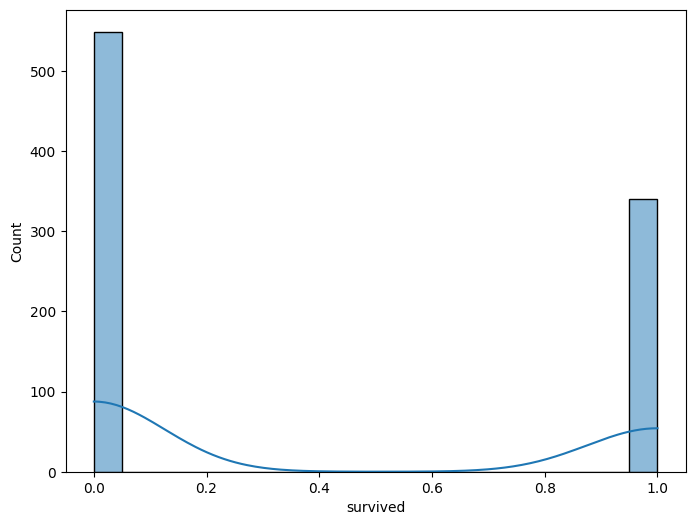

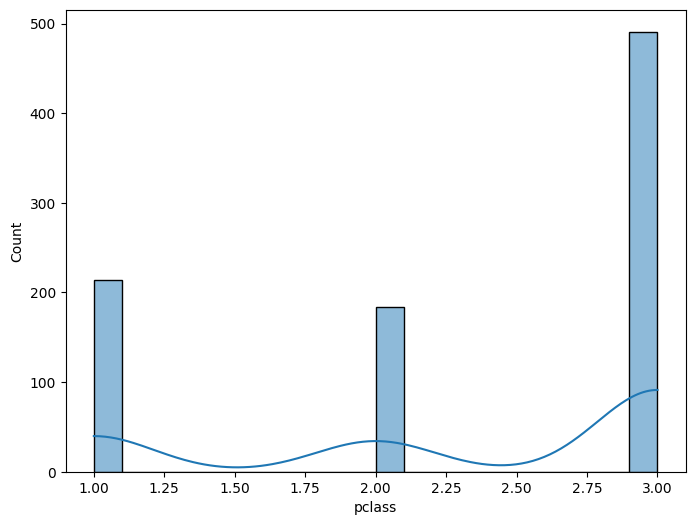

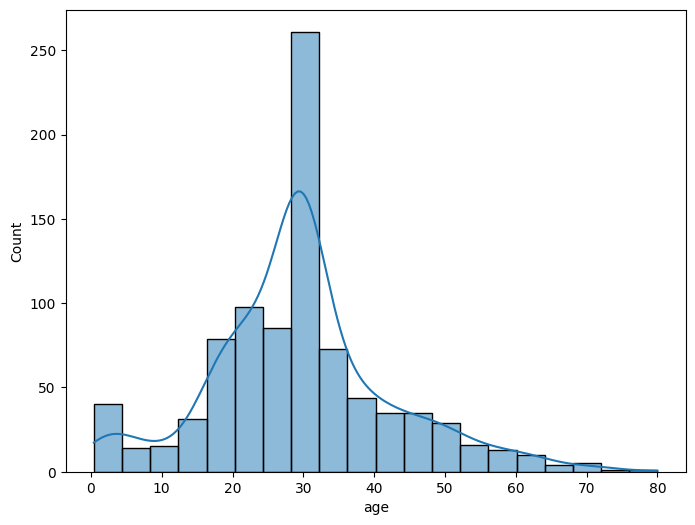

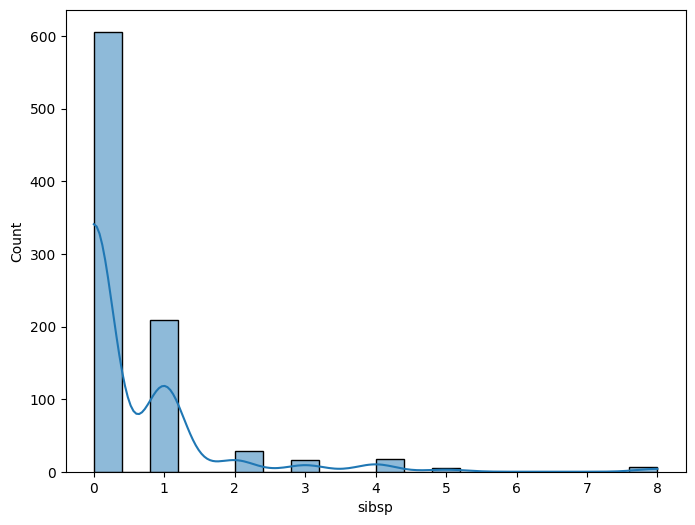

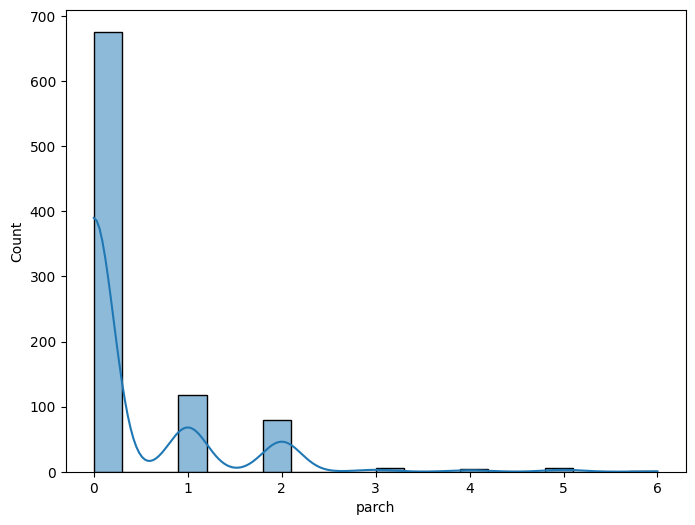

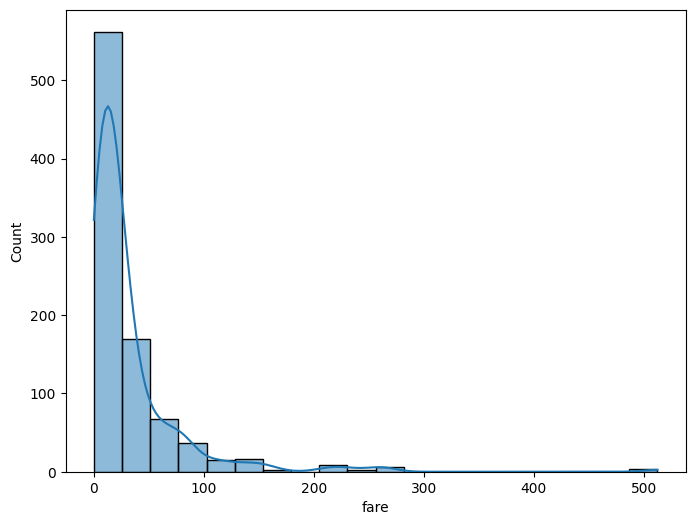

In [35]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],bins=20,kde=True)

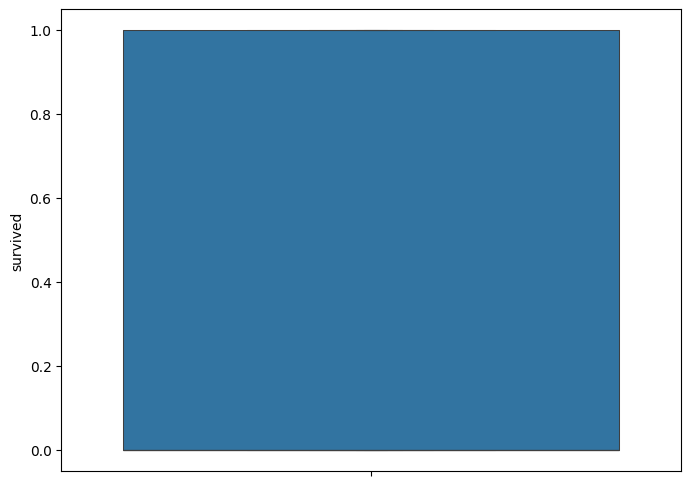

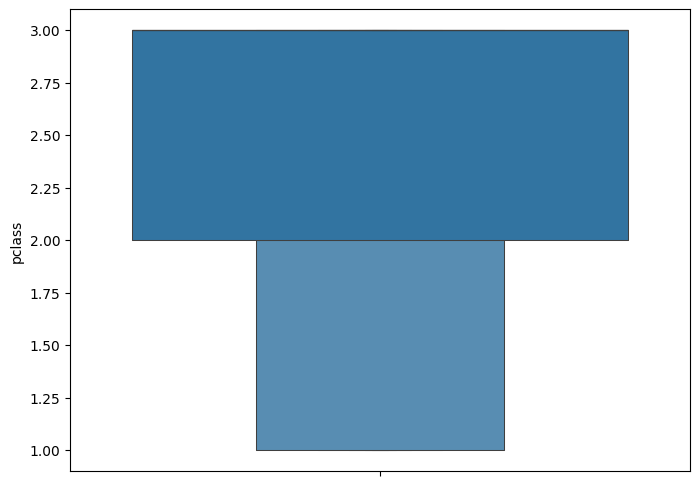

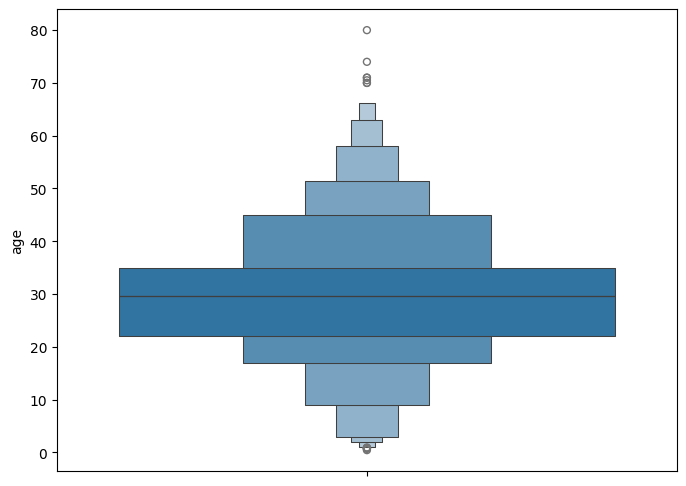

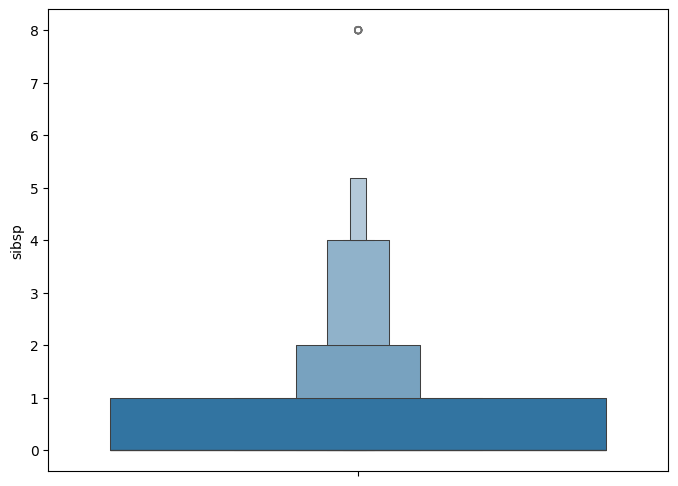

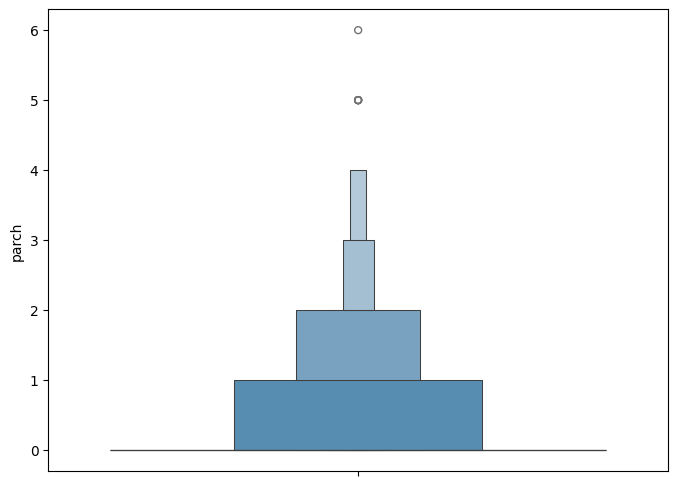

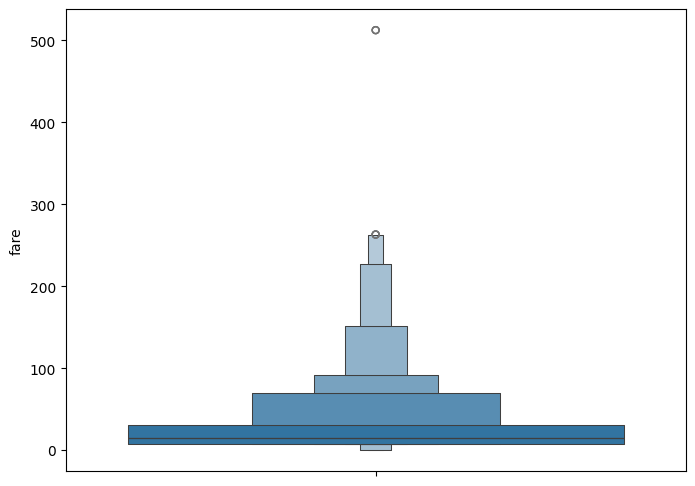

In [36]:
for col in numerical:
  plt.figure(figsize=(8,6))
  sns.boxenplot(df[col])

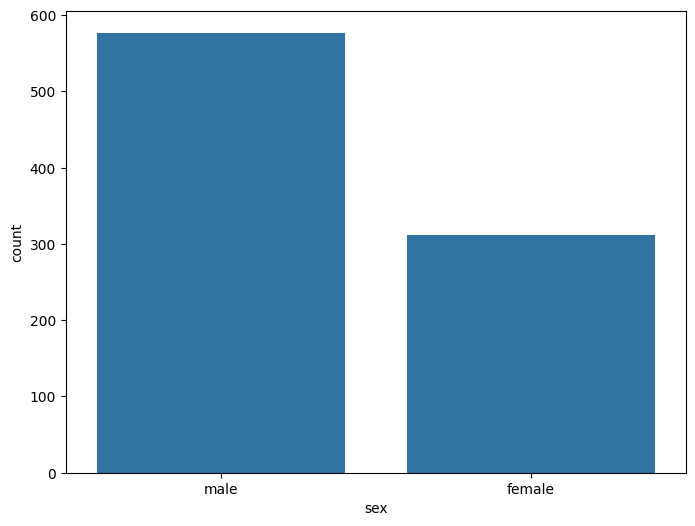

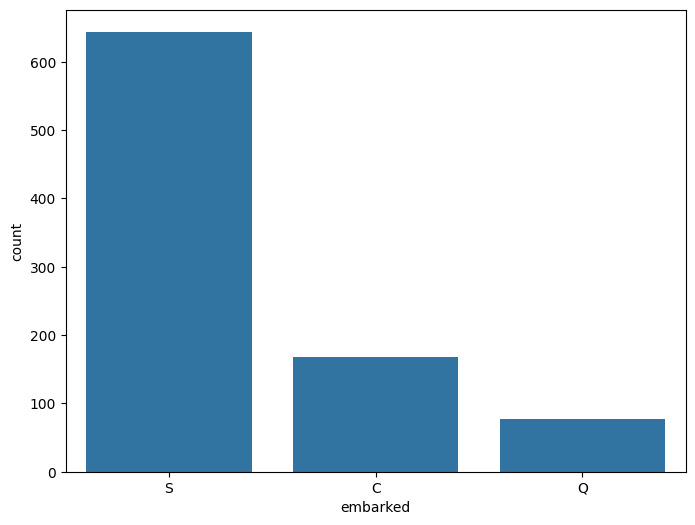

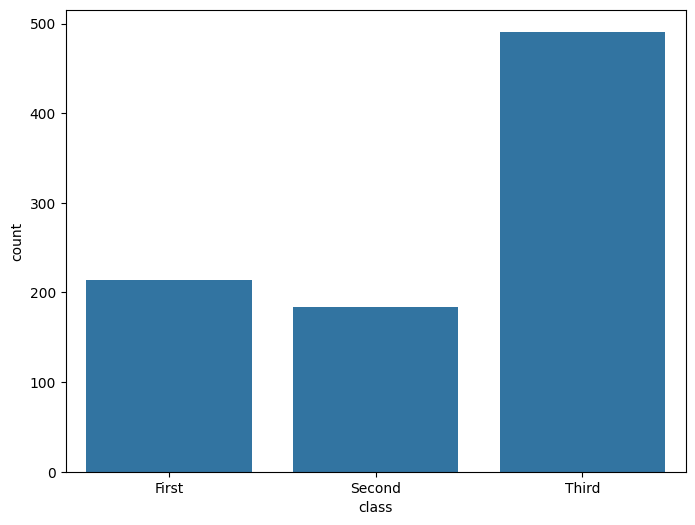

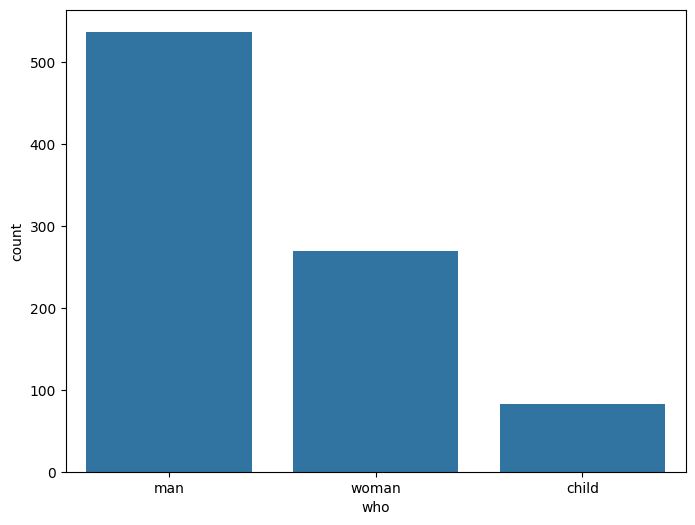

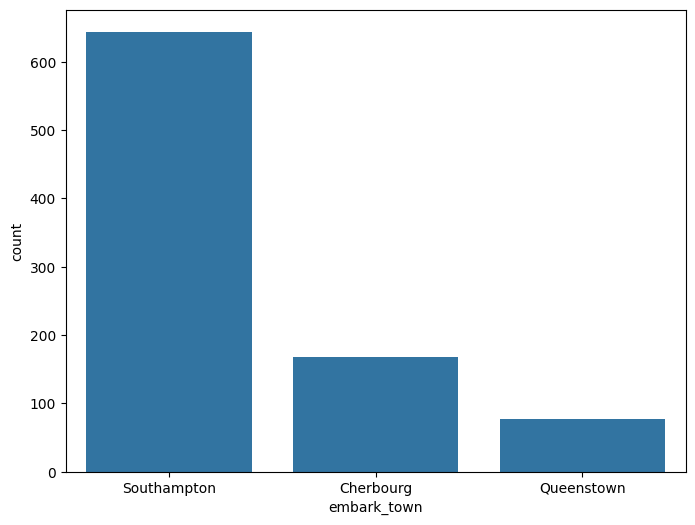

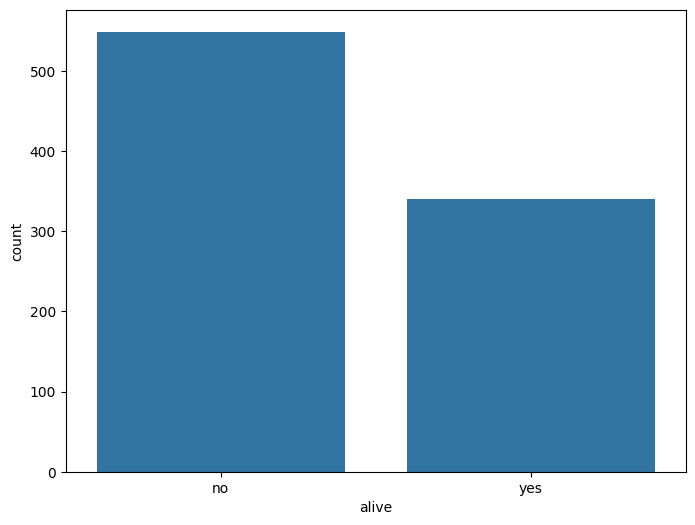

In [37]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(x=df[col])

In [38]:
label_en = [col for col in categorical if df[col].nunique()==2]
hot_en = [col for col in categorical if df[col].nunique()>2]
print(f"Label: {label_en}")
print(f"Hot: {hot_en}")

Label: ['sex', 'alive']
Hot: ['embarked', 'class', 'who', 'embark_town']


In [39]:
le = LabelEncoder()

In [40]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [41]:
df = pd.get_dummies(df,columns=hot_en)

In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,...,True,False,False,True,False,True,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,...,False,True,False,False,False,False,True,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,...,True,False,False,True,False,False,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,...,True,True,False,False,False,False,True,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,...,True,False,False,True,False,True,False,False,False,True


In [43]:
X = df.drop("survived",axis=1)
y = df["survived"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [46]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = rf.predict(X_test)

In [48]:
importances = rf.feature_importances_
features = X.columns

In [49]:
feat_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=True)

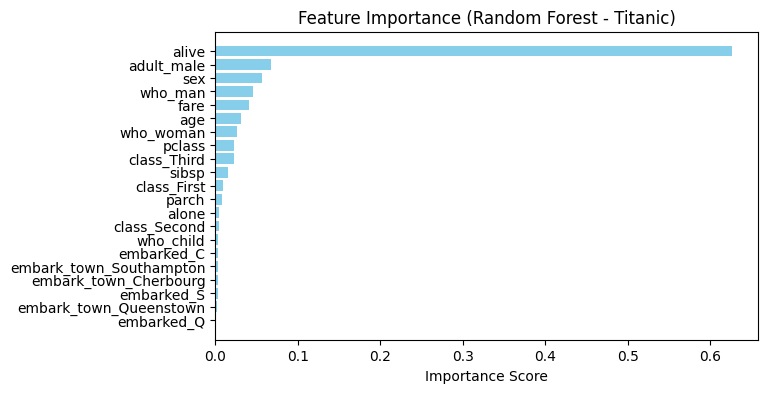

In [50]:
plt.figure(figsize=(7,4))
plt.barh(feat_df["Feature"], feat_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest - Titanic)")
plt.show()